In [ ]:
#Question no 1

import pandas as pd

# Load the dataset file
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Question no 2

# Find feature names with null values

null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]  # Filter only columns with missing values

print("Columns with missing values:\n", null_columns)

Columns with missing values:
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# Question no 3

# Fill missing values in 'Age' with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing values in 'Cabin' with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')



# Verify again
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


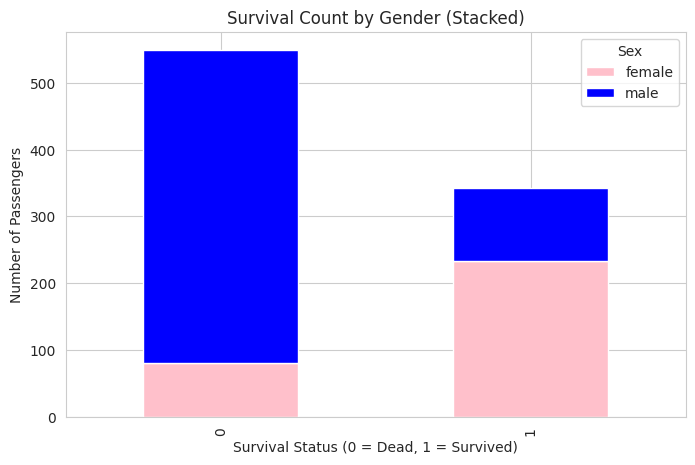

In [ ]:
# Question no 4

import matplotlib.pyplot as plt
import pandas as pd

# Create a cross-tabulation of Survived and Sex
survival_counts = pd.crosstab(df["Survived"], df["Sex"])

# Plot stacked bar chart
survival_counts.plot(kind="bar", stacked=True, figsize=(8, 5), color=["Pink", "Blue"] )

# Set labels and title
plt.xlabel("Survival Status (0 = Dead, 1 = Survived)")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Gender (Stacked)")

# Show the plot
plt.legend(title="Sex")
plt.show()

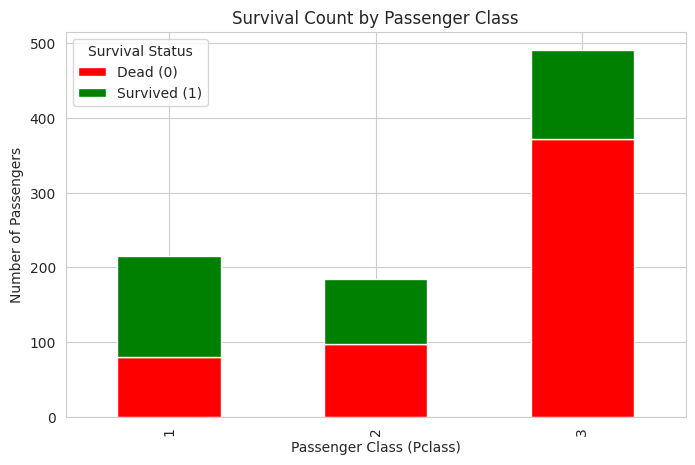

In [ ]:
# Question no 5

import matplotlib.pyplot as plt
import pandas as pd

# Create a cross-tabulation of Pclass and Survived
pclass_survival_counts = pd.crosstab(df["Pclass"], df["Survived"])

# Plot stacked bar chart
pclass_survival_counts.plot(kind="bar",stacked=True,figsize=(8, 5),color=["Red", "Green"])

# Set labels and title
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Passenger Class")

# Show the plot
plt.legend(title="Survival Status", labels=["Dead (0)", "Survived (1)"])
plt.show()


In [ ]:
# Question no 6

# Create the 'AgeClass' column based on the conditions
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(age_class)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,2


In [ ]:
# Question no 6
df.loc[df['Age'] <= 16, 'AgeClass'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'AgeClass'] = 1
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'AgeClass'] = 2
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'AgeClass'] = 3
df.loc[df['Age'] > 62, 'AgeClass'] = 4

# Display the updated dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,2


In [ ]:
# Question no 7

df = df.drop(columns=['Age'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2


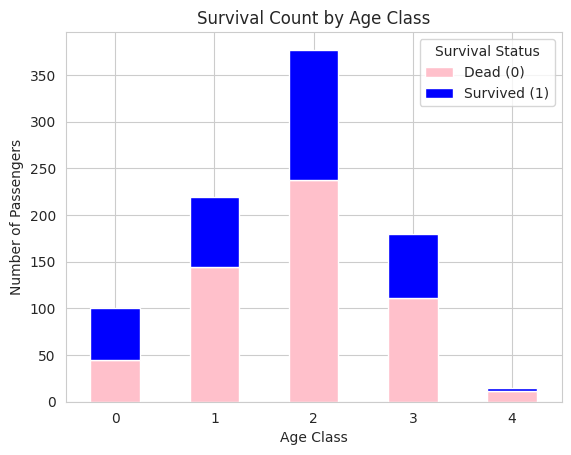

In [ ]:
# Question no 8

import matplotlib.pyplot as plt
import pandas as pd

# Group by 'AgeClass' and 'Survived', then count occurrences
ageclass_survival_counts = pd.crosstab(df["AgeClass"], df["Survived"])

# Plot stacked bar chart
ageclass_survival_counts.plot(kind="bar", stacked=True, color=["Pink", "Blue"])

# Add labels and title
plt.xlabel("Age Class")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Age Class")

# Show the plot
plt.legend(title="Survival Status", labels=["Dead (0)", "Survived (1)"])
plt.xticks(rotation=0)
plt.show()
